# demo03_iris.ipynb  基于鸢尾花数据集研究分类模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sd

In [2]:
# 加载鸢尾花数据集
iris = sd.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.pivot_table(index='target', aggfunc=[np.min, np.max])

amin                                                      \
       petal length (cm) petal width (cm) sepal length (cm) sepal width (cm)   
target                                                                         
0                    1.0              0.1               4.3              2.3   
1                    3.0              1.0               4.9              2.0   
2                    4.5              1.4               4.9              2.2   

                    amax                                                      
       petal length (cm) petal width (cm) sepal length (cm) sepal width (cm)  
target                                                                        
0                    1.9              0.6               5.8              4.4  
1                    5.1              1.8               7.0              3.4  
2                    6.9              2.5               7.9              3.8

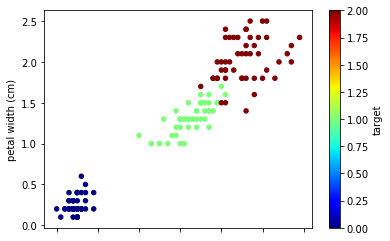

In [4]:
# 可视化显示花瓣的长度与宽度 与 鸢尾花类别的关系
data.plot.scatter(
    x='petal length (cm)', y='petal width (cm)', c='target', cmap='jet')

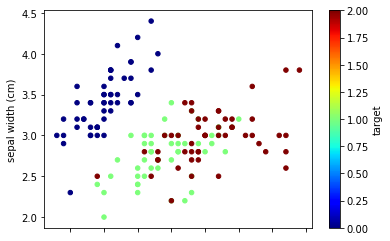

In [5]:
# 可视化显示萼片的长度与宽度 与 鸢尾花类别的关系
data.plot.scatter(
    x='sepal length (cm)', y='sepal width (cm)', c='target', cmap='jet')

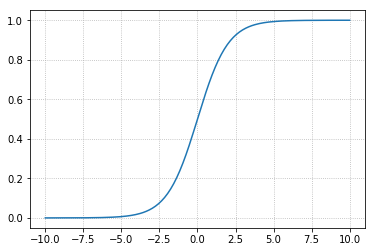

In [6]:
# 绘制sigmoid函数图像
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))
plt.grid(linestyle=':')
plt.plot(x, y)

In [14]:
# 从鸢尾花数据集中整理一组简单的子集，测试逻辑回归二分类模型
subdata = data.head(100)[['sepal length (cm)', 'sepal width (cm)', 'target']]
subdata.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [15]:
# 打乱数据集，拆分测试集与训练集，训练逻辑回归分类器
import sklearn.utils as su
import sklearn.linear_model as lm
import sklearn.model_selection as ms

x = subdata.iloc[:, :2]
y = subdata['target']

# 调用ms提供的API，拆分测试集训练集
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.2, random_state=7)

model = lm.LogisticRegression(C=1)  # 分类模型
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
result = pd.DataFrame({'test_y':test_y, 'pred_y':pred_test_y})
# 分类模型效果的评估： 预测正确的样本数/总样本数   accuracy
acc = (test_y == pred_test_y).sum() / len(test_y)
acc

1.0

In [22]:
# 针对完整的鸢尾花数据集，训练逻辑回归模型，实现分类
x = data.iloc[:, :4]
y = data['target']

In [33]:
# 拆分测试集训练集
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.3, random_state=7, 
                       stratify=y)

In [34]:
# 针对完整数据集做 5次交叉验证
model = lm.LogisticRegression(C=1)
score = ms.cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(score.mean())
score = ms.cross_val_score(model, x, y, cv=5, scoring='precision_weighted')
print(score.mean())
score = ms.cross_val_score(model, x, y, cv=5, scoring='recall_weighted')
print(score.mean())
score = ms.cross_val_score(model, x, y, cv=5, scoring='f1_weighted')
print(score.mean())

0.9600000000000002
0.9652214452214454
0.9600000000000002
0.959522933505973


In [35]:
# 训练模型
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 评估准确度
print((test_y == pred_test_y).sum() / len(test_y))

0.9555555555555556


[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


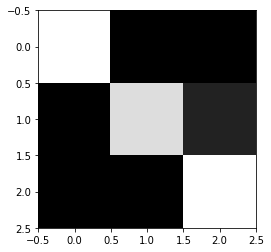

In [36]:
# 混淆矩阵
import sklearn.metrics as sm
cm = sm.confusion_matrix(test_y, pred_test_y)
print(cm)
plt.imshow(cm, cmap='gray')

In [37]:
# 输出分类报告
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.87      0.93        15
          2       0.88      1.00      0.94        15

avg / total       0.96      0.96      0.96        45



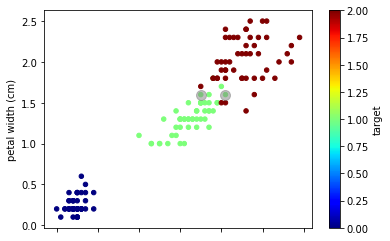

In [39]:
# 可视化显示花瓣的长度与宽度 与 鸢尾花类别的关系
ax = data.plot.scatter(
    x='petal length (cm)', y='petal width (cm)', c='target', cmap='jet')
# 可视化显示预测错误的样本
test_x[test_y!=pred_test_y].plot.scatter(
    x='petal length (cm)', y='petal width (cm)', s=100, color='gray',
    ax=ax, alpha=0.5)

分类业务实现流程：
1. 收集数据，整理数据（清洗、预处理）
2. 拆分测试集训练集 
3. 预选模型进行交叉验证（调参）
4. 训练模型
5. 模型评估（混淆矩阵、分类报告）